In [8]:
#library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [9]:
#data import & view head
df = pd.read_csv("../insurance/insurance.csv", engine='python')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


EDA(Exploratory Data Analysis)

In [5]:
#데이터에 결측치는 없는지, 각 데이터의 자료형은 어떤것인지 살펴봄
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [6]:
#데이터의 평균, 표준편차, 최댓값, 최솟값, 사분위수
#describe 함수는 숫자형 데이터에서만 작동.
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* 데이터 특징
1. 자녀의 수(children)의 표준편차가 평균편차가 비슷하다. 이는 feature의 분포가 매우 넓게 퍼져 있음을 의미한다.
    히스토그램을 그려봐야 알 수 있으나, 후에 분포를 모아주는 작업이 필요할 수도 있다.
2. 보험료(charges)가 종속변수이기 때문에 해당사항이 없지만, 만약 독립변수(feature)라고 가정한다면,
    - 보험료와 다른 feature들에 대해 숫자 단위 차이가 크다. age와 bmi는 숫자가 1~2자리지만 보험료는 만단위까지 올라간다.
      feature간의 단위차이가 클 경우, 단위가 큰 feature의 영향을 지나치게 많이 받을 가능성이 있기에 학습이 제대로 이루어지지 않을 수 있다.
    - 따라서 보통 단위가 큰 feature들은 단위를 맞춰주는 작업(scaling)이 필요하다.

Visualization

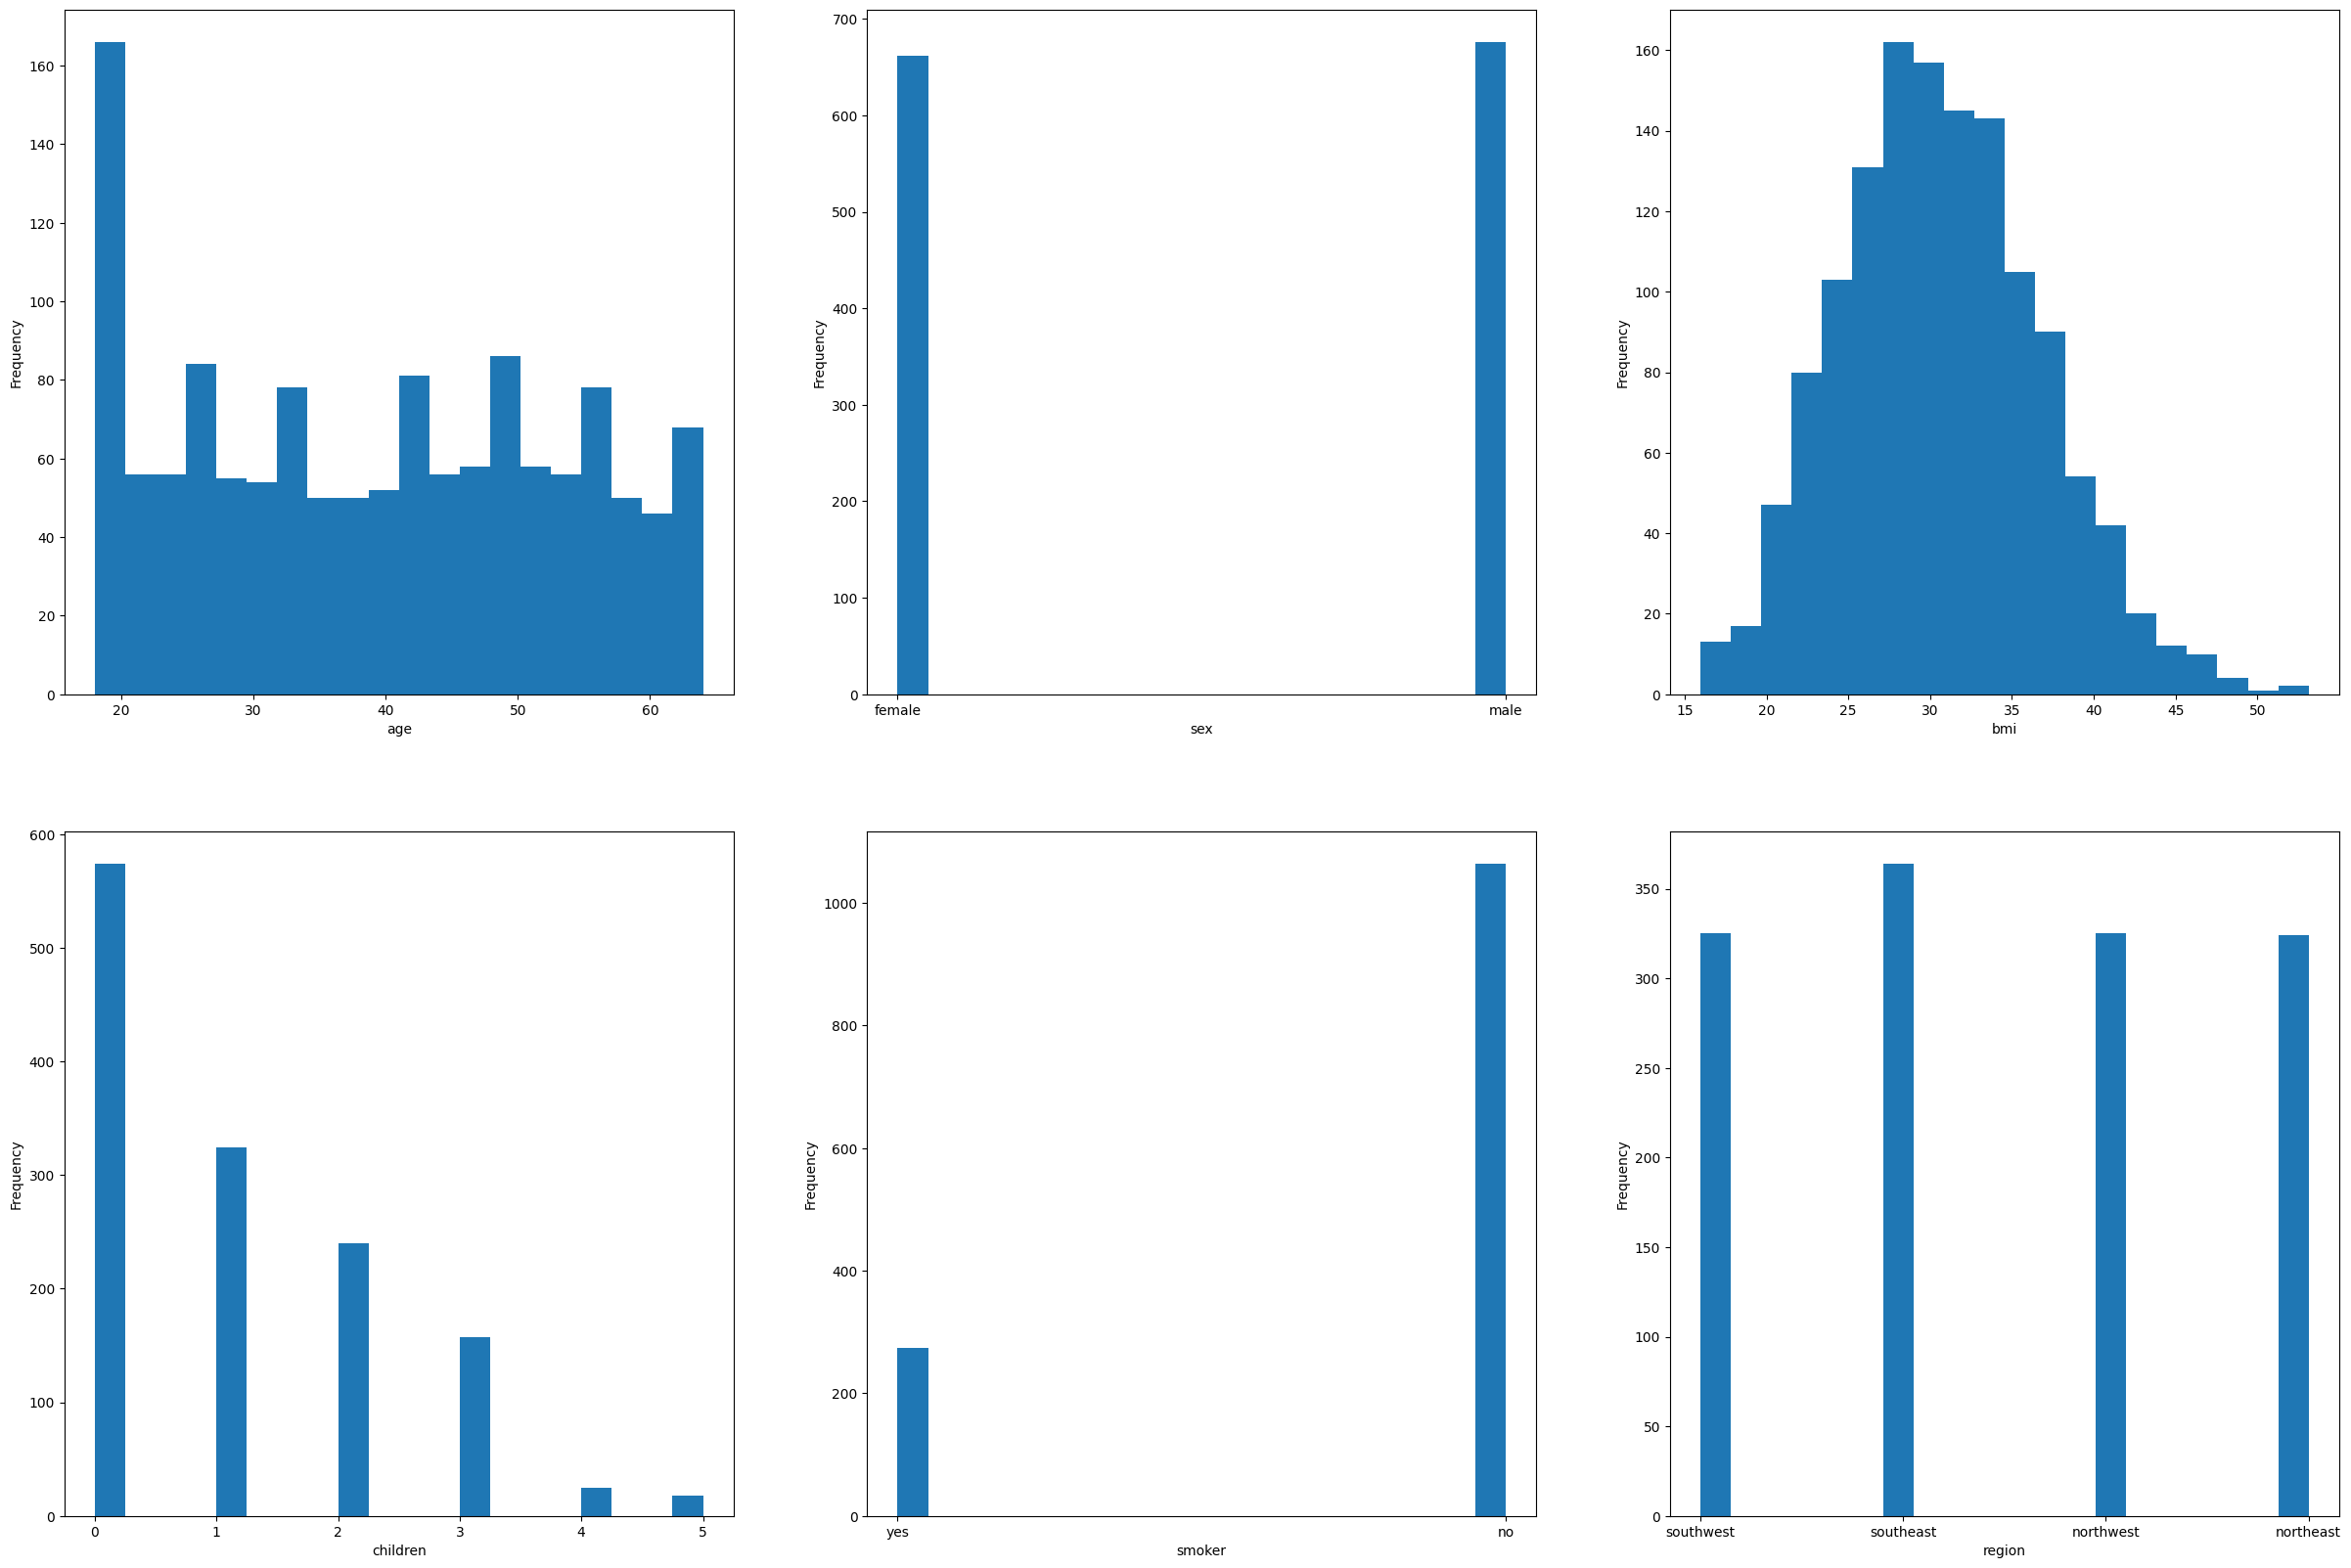

In [12]:
#히스토그램을 통해 각 변수들의 분포를 살펴봄
fig, ax = plt.subplots(2,3, figsize=(30,20))

idx = 0 # 보험료를 제외한 feature들을 지정할 인덱스
for i in range(2): # subplot들의 행(row)
    for j in range(3): # subplot들의 열(column)
        colname = list(df.columns)[idx]
        ax[i][j].hist(df[colname], bins=20)
        ax[i][j].set_xlabel(colname)
        ax[i][j].set_ylabel('Frequency')
        
        idx += 1

In [16]:
df.corr()

ValueError: could not convert string to float: 'female'

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='children', ylabel='age'>,
        <Axes: xlabel='charges', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='children', ylabel='bmi'>,
        <Axes: xlabel='charges', ylabel='bmi'>],
       [<Axes: xlabel='age', ylabel='children'>,
        <Axes: xlabel='bmi', ylabel='children'>,
        <Axes: xlabel='children', ylabel='children'>,
        <Axes: xlabel='charges', ylabel='children'>],
       [<Axes: xlabel='age', ylabel='charges'>,
        <Axes: xlabel='bmi', ylabel='charges'>,
        <Axes: xlabel='children', ylabel='charges'>,
        <Axes: xlabel='charges', ylabel='charges'>]], dtype=object)

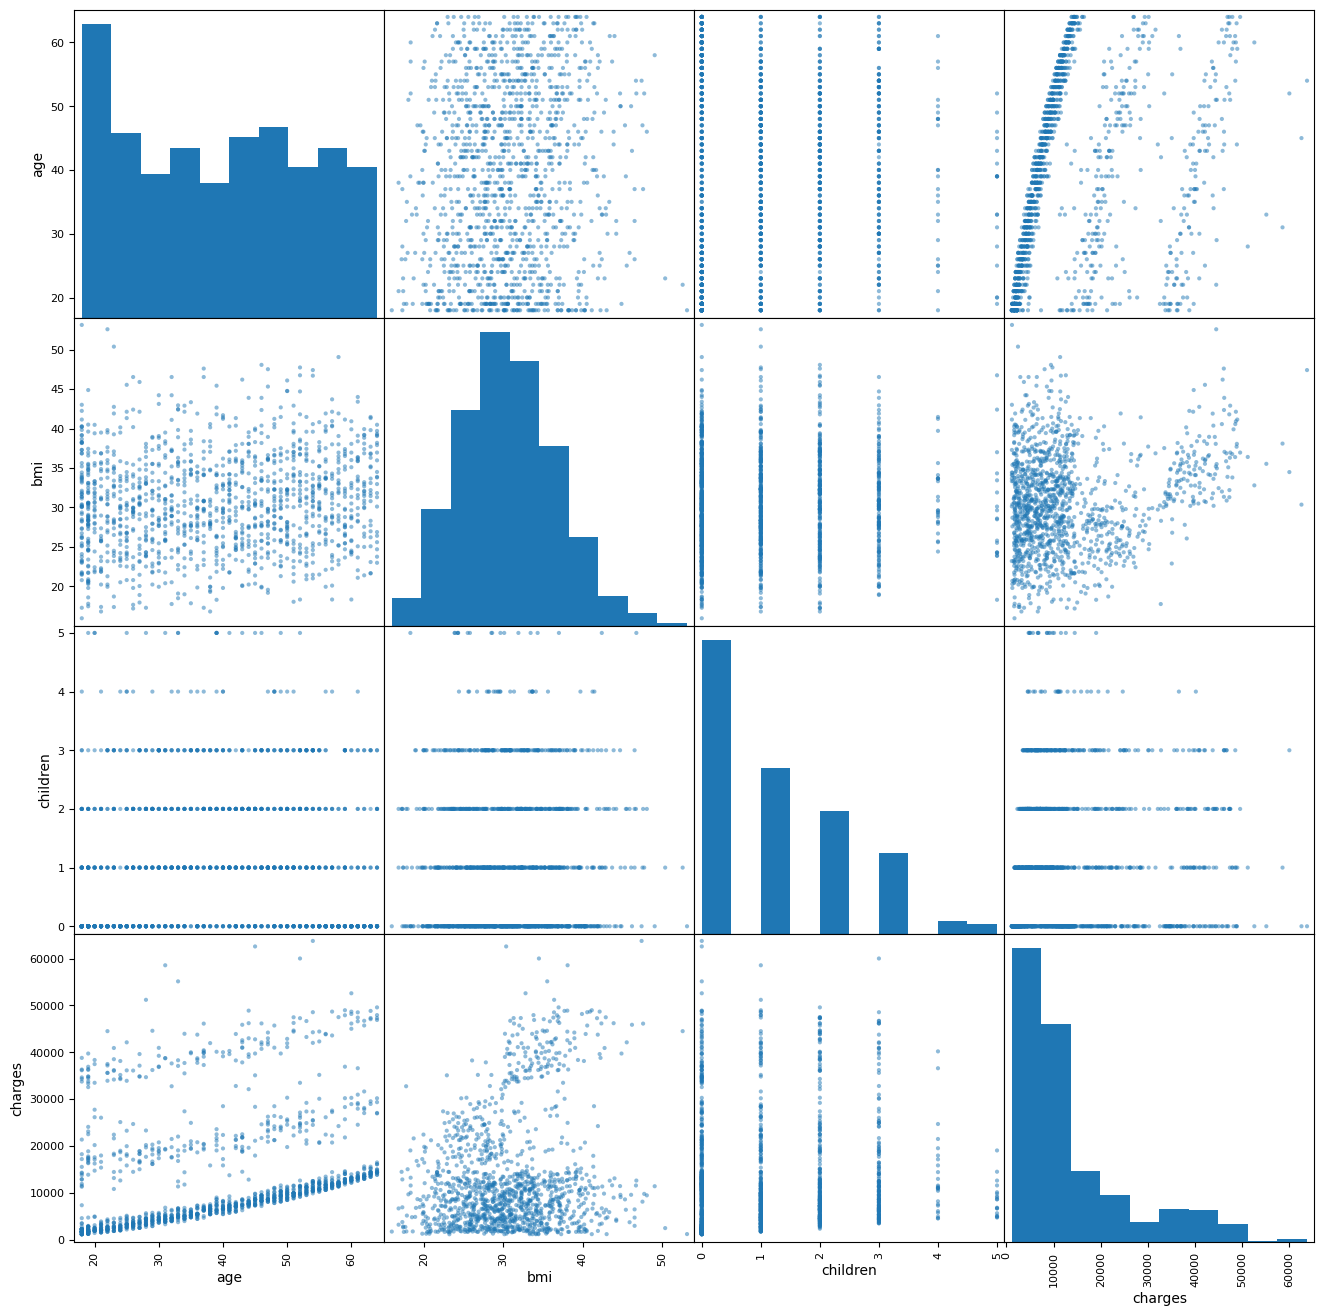

In [14]:
pd.plotting.scatter_matrix(df, figsize=(16, 16))

In [18]:
print(df['age'].min())
print(df['age'].max())

18
64


In [20]:
#연령별 구간 설정
bins = [0, 20, 25, 30, 35, 40, 45, 50, 55, 60, np.inf]
age_bin = pd.cut(df['age'], bins=bins, labels=[i+1 for i in range(len(bins)-1)])
df['age_bin'] = age_bin
df.head()

,age,sex,bmi,children,smoker,region,charges,age_bin
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,3
3,33,male,22.705,0,no,northwest,21984.47061,4
4,32,male,28.880,0,no,northwest,3866.85520,4
